# Tutorial 7 (a)

# Simple Exponential Smoothing

In [1]:
# Load all related libraries
import esFunctions as es
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import axes

import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

In [2]:
# Load the data file
ibm_df = pd.read_csv('ibm-common-stock-closing-prices.csv')

# Display the first five records
ibm_df.head()

Date  IBM common stock closing prices
0  1962-01-02                           572.00
1  1962-01-03                           577.00
2  1962-01-04                           571.25
3  1962-01-05                           560.00
4  1962-01-08                           549.50

In [3]:
# Replace long heading of the column with short heading
ibm_df.rename(columns={'IBM common stock closing prices': 'Close_Price'}, inplace = True)

# Display the first five records
ibm_df.head()

Date  Close_Price
0  1962-01-02       572.00
1  1962-01-03       577.00
2  1962-01-04       571.25
3  1962-01-05       560.00
4  1962-01-08       549.50

In [4]:
# Add a new column (SES) in the dataframe
ibm_df['SES'] = es.single_exp_smoothing(ibm_df['Close_Price'], 0.8)

# Display first five records
ibm_df.head()

Date  Close_Price      SES
0  1962-01-02       572.00  572.000
1  1962-01-03       577.00  576.000
2  1962-01-04       571.25  572.200
3  1962-01-05       560.00  562.440
4  1962-01-08       549.50  552.088

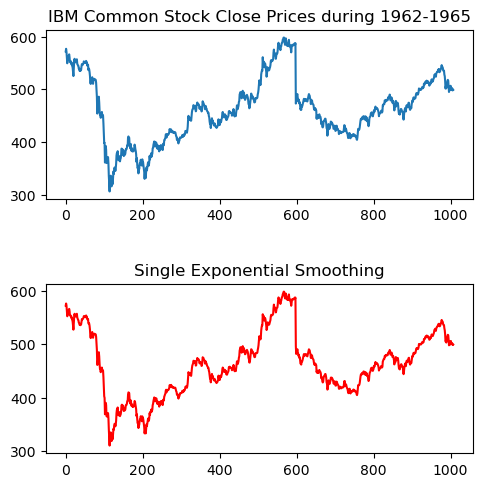

In [5]:
# plot the above dataframe
fig = plt.figure(figsize = (5.5, 5.5))
ax = fig.add_subplot(2, 1, 1)
fig.subplots_adjust(hspace = 0.5)
ibm_df['Close_Price'].plot(ax = ax)
ax.set_title('IBM Common Stock Close Prices during 1962-1965')
ax = fig.add_subplot(2, 1, 2)
ibm_df['SES'].plot(ax = ax, color = 'r')
ax.set_title('Single Exponential Smoothing')

# Save the png file on your folder
plt.savefig('_02_1.png', format = 'png', dpi = 300)

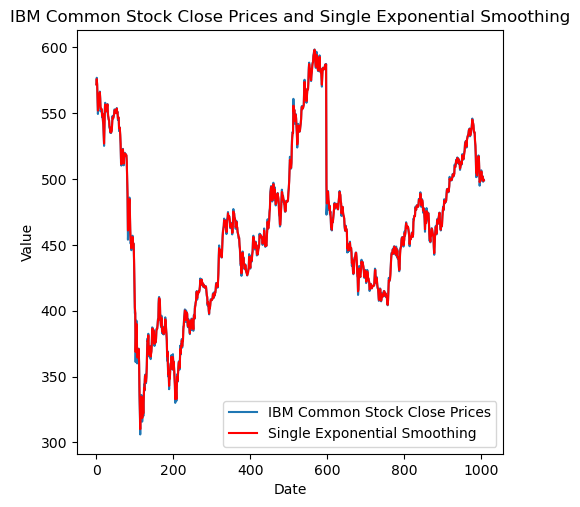

In [6]:
import matplotlib.pyplot as plt

# plot the above dataframe
fig, ax = plt.subplots(figsize = (5.5, 5.5))
fig.subplots_adjust(hspace = 0.5)

ibm_df['Close_Price'].plot(ax = ax, label = 'IBM Common Stock Close Prices')
ibm_df['SES'].plot(ax = ax, color = 'r', label = 'Single Exponential Smoothing')

ax.set_title('IBM Common Stock Close Prices and Single Exponential Smoothing')
ax.set_xlabel('Date')
ax.set_ylabel('Value')
ax.legend()

# Save the png file in your folder
plt.savefig('_02_1.png', format = 'png', dpi =300)
plt.show()


In [7]:
# Comapre Single exponential smooting for three values of alpha (0.2, 0.6, 0.8)
ibm_df['SES2'] = es.single_exp_smoothing(ibm_df['Close_Price'], 0.2)
ibm_df['SES6'] = es.single_exp_smoothing(ibm_df['Close_Price'], 0.6)
ibm_df['SES8'] = es.single_exp_smoothing(ibm_df['Close_Price'], 0.8)

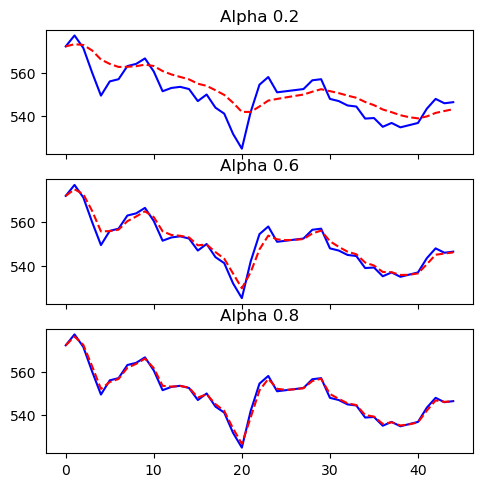

In [8]:
# plot three figures for three values of alpha
f, axarr = plt.subplots(3, sharex = True)
f.set_size_inches(5.5, 5.5)

ibm_df['Close_Price'].iloc[:45].plot(color='b', linestyle = '-', ax=axarr[0])
ibm_df['SES2'].iloc[:45].plot(color='r', linestyle = '--', ax=axarr[0])
axarr[0].set_title('Alpha 0.2')

ibm_df['Close_Price'].iloc[:45].plot(color='b', linestyle = '-', ax=axarr[1])
ibm_df['SES6'].iloc[:45].plot(color='r', linestyle = '--', ax=axarr[1])
axarr[1].set_title('Alpha 0.6')

ibm_df['Close_Price'].iloc[:45].plot(color='b', linestyle = '-', ax=axarr[2])
ibm_df['SES8'].iloc[:45].plot(color='r', linestyle = '--', ax=axarr[2])
axarr[2].set_title('Alpha 0.8')
plt.savefig('_02_02.png', format='png', dpi=300)

# Double Exponential Smoothing

In [9]:
# Load the dataset
beer_df = pd.read_csv('quarterly-beer-production-in-aus-March 1956-June 1994.csv')

# Display first five records
beer_df.head()

Quarter  \
0  1956Q1   
1  1956Q2   
2  1956Q3   
3  1956Q4   
4  1957Q1   

   Quarterly beer production in Australia: megalitres. March 1956 ? June 1994  
0                                              284.4                           
1                                              212.8                           
2                                              226.9                           
3                                              308.4                           
4                                              262.0

In [10]:
# Replace the long heading of the column with short 
beer_df.rename(columns={'Quarterly beer production in Australia: megalitres. March 1956 ? June 1994': 'Beer_Prod'
                       }, inplace = True)

# Display first five records
beer_df.head()

Quarter  Beer_Prod
0  1956Q1      284.4
1  1956Q2      212.8
2  1956Q3      226.9
3  1956Q4      308.4
4  1957Q1      262.0

In [11]:
# Check if there is any null values present
missing = (pd.isnull(beer_df['Quarter'])) | (pd.isnull(beer_df['Beer_Prod']))
print('Number of rows with at least one missing values:', missing.sum())
beer_df = beer_df.loc[~missing, :]
print('Shape after removing missing values:', beer_df.shape)

Number of rows with at least one missing values: 1
Shape after removing missing values: (154, 2)


In [12]:
# Calculate the forecast values for different values of alpha and beta
beer_df['DEF00'] = es.double_exp_smoothing(beer_df['Beer_Prod'], 0, 0)
beer_df['DEF01'] = es.double_exp_smoothing(beer_df['Beer_Prod'], 0, 1)
beer_df['DEF10'] = es.double_exp_smoothing(beer_df['Beer_Prod'], 1, 0)
beer_df['DEF11'] = es.double_exp_smoothing(beer_df['Beer_Prod'], 1, 1)

Text(0.5, 1.0, 'TES: alpha=1, beta=1')

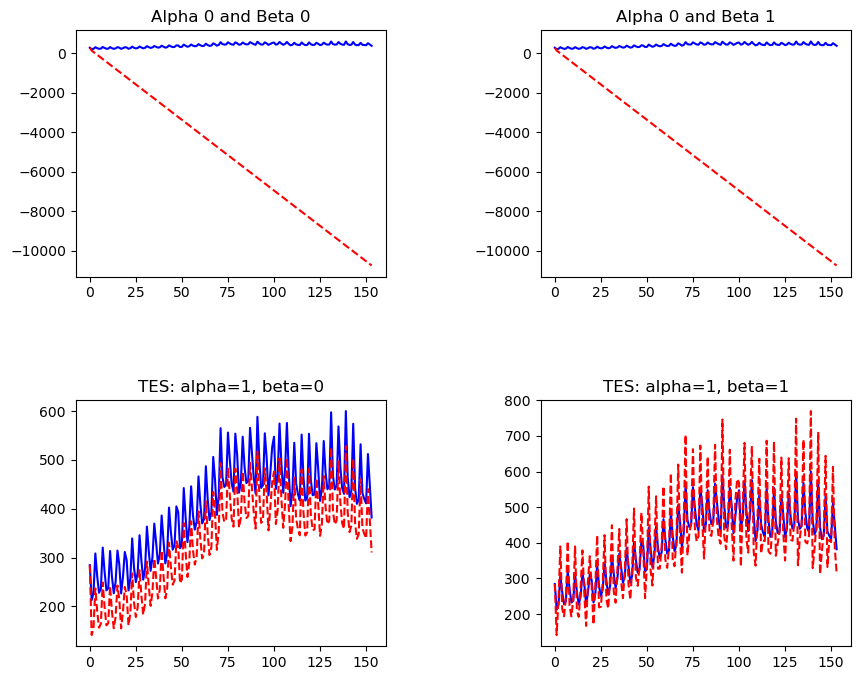

In [13]:
fig = plt.figure(figsize=(10, 8))
fig.subplots_adjust(hspace=.5, wspace=.5)

ax = fig.add_subplot(2,2,1)
beer_df['Beer_Prod'].plot(color='b', linestyle = '-', ax=ax)
beer_df['DEF00'].plot(color='r', linestyle = '--', ax=ax)
ax.set_title('Alpha 0 and Beta 0')

ax = fig.add_subplot(2,2,2)
beer_df['Beer_Prod'].plot(color='b', linestyle = '-', ax=ax)
beer_df['DEF01'].plot(color='r', linestyle = '--', ax=ax)
ax.set_title('Alpha 0 and Beta 1')

ax = fig.add_subplot(2,2,3)
beer_df['Beer_Prod'].plot(color='b', linestyle = '-', ax=ax)
beer_df['DEF10'].plot(color='r', linestyle = '--', ax=ax)
ax.set_title('TES: alpha=1, beta=0')

ax = fig.add_subplot(2,2,4)
beer_df['Beer_Prod'].plot(color='b', linestyle = '-', ax=ax)
beer_df['DEF11'].plot(color='r', linestyle = '--', ax=ax)
ax.set_title('TES: alpha=1, beta=1')

In [14]:
beer_df['DEF'] = es.double_exp_smoothing(beer_df['Beer_Prod'], 0.4, 0.7)

Text(0.5, 1.0, 'Double Smoothing Forecast')

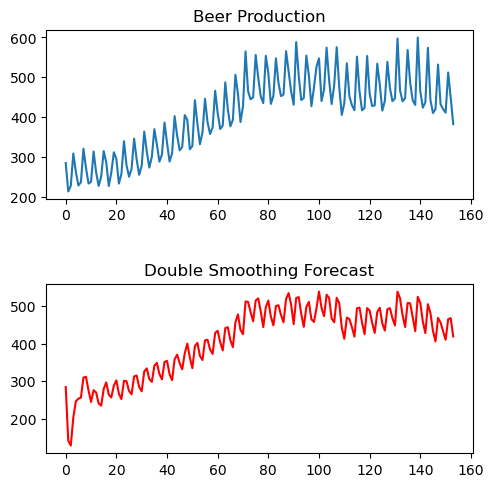

In [15]:
fig = plt.figure(figsize = (5.5, 5.5))
ax = fig.add_subplot(2, 1, 1)
fig.subplots_adjust(hspace = .5)
beer_df['Beer_Prod'].plot(ax = ax)
ax.set_title('Beer Production')
ax = fig.add_subplot(2, 1, 2)
beer_df['DEF'].plot(ax = ax, color = 'r')
ax.set_title('Double Smoothing Forecast')

In [16]:
beer_df['Single_Exponential_Forecast'] = es.single_exp_smoothing(beer_df['Beer_Prod'], 0.4)

Text(0.5, 1.0, 'Double Smoothing Forecast')

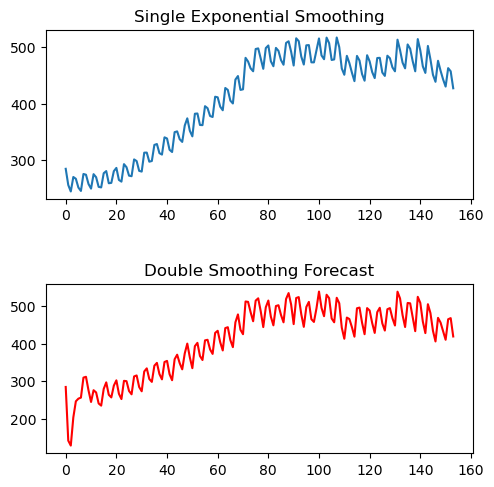

In [17]:
fig = plt.figure(figsize = (5.5, 5.5))
ax = fig.add_subplot(2, 1, 1)
fig.subplots_adjust(hspace = .5)
beer_df['Single_Exponential_Forecast'].plot(ax = ax)
ax.set_title('Single Exponential Smoothing')
ax = fig.add_subplot(2, 1, 2)
beer_df['DEF'].plot(ax = ax, color = 'r')
ax.set_title('Double Smoothing Forecast')

Text(0.5, 1.0, 'Actual Vs Single Smoothing Forecasting')

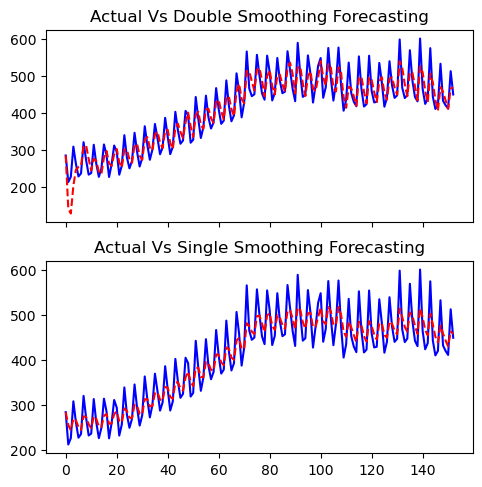

In [18]:
f, axarr = plt.subplots(2, sharex = True)
f.set_size_inches(5.5, 5.5)
beer_df['Beer_Prod'].iloc[:153].plot(color = 'b', linestyle = '-', ax = axarr[0])
beer_df['DEF'].iloc[:153].plot(color = 'r', linestyle = '--', ax = axarr[0])
axarr[0].set_title('Actual Vs Double Smoothing Forecasting')

beer_df['Beer_Prod'].iloc[:153].plot(color='b', linestyle = '-', ax=axarr[1])
beer_df['Single_Exponential_Forecast'].iloc[:153].plot(color='r', linestyle = '--', ax=axarr[1])
axarr[1].set_title('Actual Vs Single Smoothing Forecasting')

# Triple Exponential Smoothing

In [19]:
# Load the dataset
wisc_emp = pd.read_csv('wisconsin-employment-time-series.csv')

# Display first ten records
wisc_emp.head(10)

Month  Employment
0  1961-01       239.6
1  1961-02       236.4
2  1961-03       236.8
3  1961-04       241.5
4  1961-05       243.7
5  1961-06       246.1
6  1961-07       244.1
7  1961-08       244.2
8  1961-09       244.8
9  1961-10       246.6

In [20]:
print('Shape of the DataFrame:', wisc_emp.shape)

Shape of the DataFrame: (178, 2)


<Axes: >

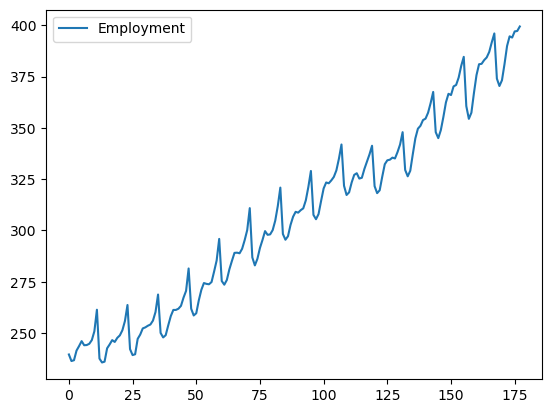

In [21]:
wisc_emp.plot()

In [22]:
es.initialize_T(wisc_emp['Employment'], 12)

1.6916666666666653

In [23]:
es.initialize_seasonalilty(wisc_emp['Employment'], 12) 

{0: -11.325000000000015,
 1: -14.48214285714287,
 2: -12.667857142857159,
 3: -6.403571428571445,
 4: -1.603571428571444,
 5: 1.5535714285714164,
 6: 1.0821428571428413,
 7: 2.22499999999998,
 8: 3.539285714285705,
 9: 6.89642857142856,
 10: 11.774999999999986,
 11: 19.410714285714267}

In [24]:
# Call Triple exponential smooting for different values of alpha, beta and gamma
wisc_emp['TEF001'] = es.triple_exp_smoothing(wisc_emp['Employment'], 12, 0, 0, 1)
wisc_emp['TEF010'] = es.triple_exp_smoothing(wisc_emp['Employment'], 12, 0, 1, 0)
wisc_emp['TEF100'] = es.triple_exp_smoothing(wisc_emp['Employment'], 12, 1, 0, 0)

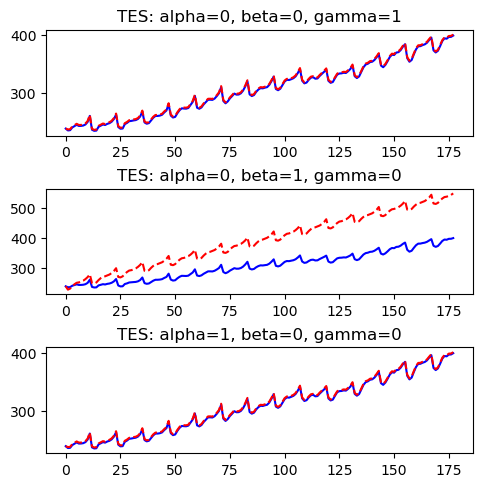

In [25]:
# plot the results for three different cases
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(3,1,1)
wisc_emp['Employment'].plot(color='b', linestyle = '-', ax=ax)
wisc_emp['TEF001'].plot(color='r', linestyle = '--', ax=ax)
ax.set_title('TES: alpha=0, beta=0, gamma=1')

ax = fig.add_subplot(3,1,2)
wisc_emp['Employment'].plot(color='b', linestyle = '-', ax=ax)
wisc_emp['TEF010'].plot(color='r', linestyle = '--', ax=ax)
ax.set_title('TES: alpha=0, beta=1, gamma=0')

ax = fig.add_subplot(3,1,3)
wisc_emp['Employment'].plot(color='b', linestyle = '-', ax=ax)
wisc_emp['TEF100'].plot(color='r', linestyle = '--', ax=ax)
ax.set_title('TES: alpha=1, beta=0, gamma=0')
fig.subplots_adjust(hspace=.5)

In [26]:
wisc_emp['TEF110'] = es.triple_exp_smoothing(wisc_emp['Employment'], 12, 1, 1, 0)
wisc_emp['TEF101'] = es.triple_exp_smoothing(wisc_emp['Employment'], 12, 1, 0, 1)
wisc_emp['TEF011'] = es.triple_exp_smoothing(wisc_emp['Employment'], 12, 1, 1, 1)

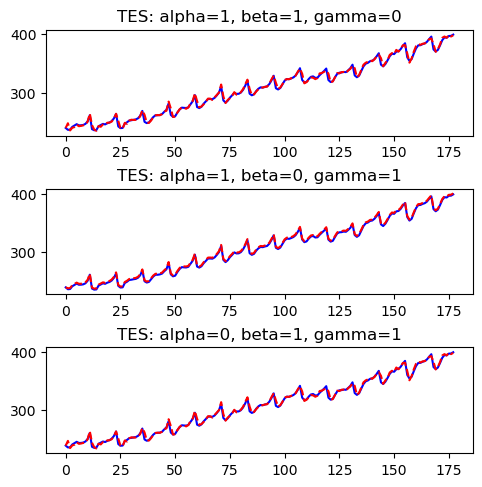

In [27]:
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(3,1,1)
wisc_emp['Employment'].plot(color='b', linestyle = '-', ax=ax)
wisc_emp['TEF110'].plot(color='r', linestyle = '--', ax=ax)
ax.set_title('TES: alpha=1, beta=1, gamma=0')

ax = fig.add_subplot(3,1,2)
wisc_emp['Employment'].plot(color='b', linestyle = '-', ax=ax)
wisc_emp['TEF101'].plot(color='r', linestyle = '--', ax=ax)
ax.set_title('TES: alpha=1, beta=0, gamma=1')

ax = fig.add_subplot(3,1,3)
wisc_emp['Employment'].plot(color='b', linestyle = '-', ax=ax)
wisc_emp['TEF011'].plot(color='r', linestyle = '--', ax=ax)
ax.set_title('TES: alpha=0, beta=1, gamma=1')
fig.subplots_adjust(hspace=.5)

In [28]:
# Add a new column for Triple exponential series
wisc_emp['TES'] = es.triple_exp_smoothing(wisc_emp['Employment'], 12, 0.4, 0.6, 0.2)

Text(0.5, 1.0, 'Triple Smoothing Forecast')

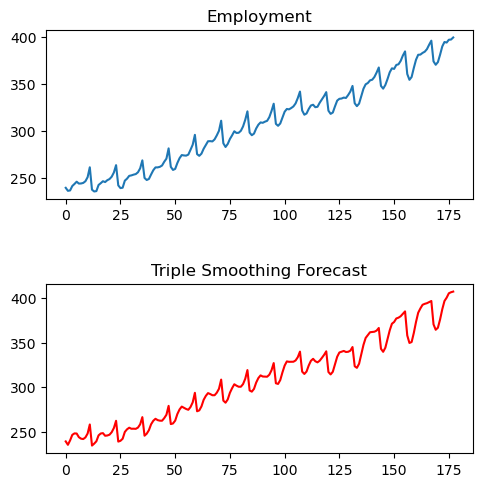

In [29]:
# Show the plot for Triple exponential smoothing
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(2,1,1)
fig.subplots_adjust(hspace=.5)
wisc_emp['Employment'].plot(ax=ax)
ax.set_title('Employment')
ax = fig.add_subplot(2,1,2)
wisc_emp['TES'].plot(ax=ax, color='r')
ax.set_title('Triple Smoothing Forecast')

## Reference:
* Practical Time Series Analysis (Chapter 3), Dr. Avishek Pal, Dr. PKS Prakash, Packt Publishing, September 2017.